# IAU-PROJEKT, STAHOVEC a VIEST
------------------------------------------------
Projekt začína základnými importmi pre knižnice, ktoré budeme v projekte používať

In [806]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import statsmodels.stats as sm_stats

In [807]:
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_palette("viridis")

Hneď na začiatok si **načítame dáta** zo súboru funkciou **read_csv()**
Následne vykonáme prvú "čistiacu" operáciu, v ktorej vymažeme prvý stĺpec, v ktorom
je očíslovanie stĺpcov, ktoré je pre našu analýzu zbytočné.

In [808]:
# sns.set_palette("vlag")
data_labor = pd.read_csv("dataset/labor.csv", sep="\t")
# del data["Unnamed: 0"]
data_labor = data_labor.iloc[:, 1:]
data_labor

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Y,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,no,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,Y,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,Y,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


V tejto časti očistíme dáta v stĺpci **smoker**, kde všetky nejednotné záznamy
nahradíme numerickými reprezentáciámi možností áno/nie.

In [809]:
data_labor["smoker"] = data_labor["smoker"].str.replace("yes", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("no", "0")
data_labor["smoker"] = data_labor["smoker"].str.replace("Y", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("N", "0")
data_labor["smoker"] = data_labor["smoker"].astype(float)

data_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smoker        9971 non-null   float64
 1   hbver         9940 non-null   float64
 2   erytrocyty    9939 non-null   float64
 3   alt           9941 non-null   float64
 4   leukocyty     9941 non-null   float64
 5   etytr         9940 non-null   float64
 6   hemoglobin    9940 non-null   float64
 7   ssn           9971 non-null   object 
 8   name          9971 non-null   object 
 9   trombocyty    9941 non-null   float64
 10  alp           9941 non-null   float64
 11  relationship  9971 non-null   object 
 12  indicator     9971 non-null   float64
 13  er-cv         9941 non-null   float64
 14  weight        9971 non-null   float64
 15  ast           9941 non-null   float64
 16  hematokrit    9941 non-null   float64
dtypes: float64(14), object(3)
memory usage: 1.3+ MB


V nasledujúcej bunke sme **nahradili chýbajúce hodnoty** priemerom v danom stĺpci.
Túto operáciu sme mohli vykonať z dôvodu, že všetky **chýbajúce hodnoty** boli iba v tých
stĺpcoch, ktoré obsahujú **numerické hodnoty** (float64).

In [810]:
data_labor = data_labor.fillna(data_labor.mean())
data_labor

/tmp/ipykernel_20406/3025875362.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_labor = data_labor.fillna(data_labor.mean())


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,1.0,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,0.0,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,1.0,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,1.0,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


In [811]:
data_labor.describe()

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,0.406278,6.071692,6.842049,1.120983,6.064355,5.318564,6.062952,6.084395,54.622262,0.643165,51.121580,70.305658,50.459989,6.461410
std,0.491162,1.000834,1.460087,2.019724,1.009118,1.393256,1.741981,1.006202,26.103211,0.479090,12.856008,34.976941,12.771838,1.617865
min,0.000000,2.148000,1.103640,0.000000,2.239400,0.548790,0.000000,2.587100,0.000000,0.000000,0.000000,-54.061950,0.000000,1.991860
25%,0.000000,5.401305,6.037930,0.563945,5.393100,4.444160,4.780500,5.407585,31.460750,0.000000,42.546015,46.128010,41.770680,5.127505
50%,0.000000,6.071692,7.004430,0.780950,6.071080,5.120390,6.115310,6.084395,58.533820,1.000000,50.954600,70.793900,50.618370,6.753050
75%,1.000000,6.742105,7.807580,1.166560,6.730190,6.019805,7.378890,6.765420,78.880725,1.000000,59.861495,94.071090,59.039665,7.490275
max,1.000000,10.532500,12.769020,100.000000,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,100.000000,194.734070,100.000000,13.021170


# 1. fáza - Prieskumná analýza

## a) Základný opis dát spolu s ich charakteristikami
-------------------------------------------------------
Základné informácie o datasete:

In [812]:
print(f"Počet záznamov v našom datasete: {len(data_labor.index)}")
print(f"Počet atribútov v našom datasete: {len(data_labor.columns)}")
# print(f"Dátové typy v našom datasete:\n {data_labor.dtypes}")
print(f"Dátové typy v našom datasete: {list(set(data_labor.dtypes))}")

Počet záznamov v našom datasete: 9971
Počet atribútov v našom datasete: 17
Dátové typy v našom datasete: [dtype('float64'), dtype('O')]


V tejto časti uvedieme pre zvolené **významné atribúty ich distribúcie a základné
deskriptívne štatistiky.**
Medzi tieto významné atribúty patria **erytrocyty, leukocyty, trombocyty a váha**.
Pre ich deskriptívne štatistiky uvádzame **medián, modus, priemer, rozptyl a smerodajnú odchylku.**
<br>

Hodnota modusu je väčšinou **rovná priemeru**, keďže nahradzujeme chýbajúce hodnoty priemerom. Je
potrebné brať tieto hodnoty s rezervou, keďže dáta ešte neboli očistené a mnoho záznamov spadá
do surreálnych hodnôt (napr. záporné záznamy pre atribút váhy).
</br>

Ako môžeme vidieť na distplote, tak atribút erytrocyty nemá normálnu distribúciu, no
nie je od tej podoby ďaleko.

###  Erytrocyty

Pri erytrocytoch vidíme, že na začiatku krivky je mierna odchýlka, ktorá spôsobuje to,
že táto distribúcia
nie je Gaussova aj keď, približne od hodnoty 5 na x-ovej osi by sa dalo povedať,
že distribúcia je normálová.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[erytrocyty] Medián:   7.00443
[erytrocyty] Modus:    6.842048781567562
[erytrocyty] Priemer:  6.842048781567561
[erytrocyty] Rozptyl:  2.1316401076201124
[erytrocyty] Smerodajná odchylka:  1.4600137354217297


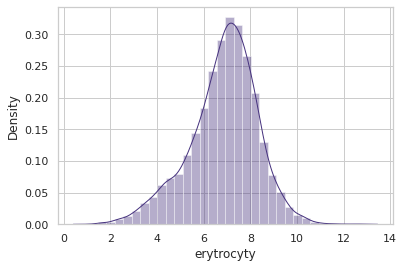

In [813]:
sns.distplot(data_labor["erytrocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

### Leukocyty

Pri leukocytoch vidíme menší spike presne v strede distribúcie, čo môže byť náhoda
znásobená faktom, že sme nahradzovali chýbajúce hodnoty údajom, ktorý sa nachádza
práve na tom mieste.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[leukocyty] Medián:   6.07108
[leukocyty] Modus:    6.064355209737452
[leukocyty] Priemer:  6.0643552097374505
[leukocyty] Rozptyl:  1.0182179280312194
[leukocyty] Smerodajná odchylka:  1.0090678510542388


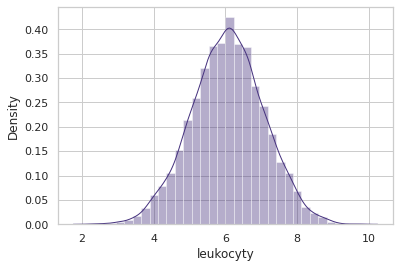

In [814]:
sns.distplot(data_labor["leukocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="leukocyty", bins=24, kde=True)
print(f"[leukocyty] Medián:  ", data_labor["leukocyty"].median())
print(f"[leukocyty] Modus:   ", data_labor.mode()["leukocyty"][0])
print(f"[leukocyty] Priemer: ", data_labor["leukocyty"].mean())
print(f"[leukocyty] Rozptyl: ", np.var(data_labor["leukocyty"]))
print(f"[leukocyty] Smerodajná odchylka: ", np.std(data_labor["leukocyty"]))


### Trombocyty

Pri trombocytoch vidíme pomerne veľkú odchýlku v strede distribúcie. Inak je distribúcia Gaussova,
čo znamená, že hodnoty sú rovnomerne rozložené naprieč grafom.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[trombocyty] Medián:   6.084394732924253
[trombocyty] Modus:    6.084394732924253
[trombocyty] Priemer:  6.084394732924253
[trombocyty] Rozptyl:  1.0123415736654913
[trombocyty] Smerodajná odchylka:  1.0061518641166904


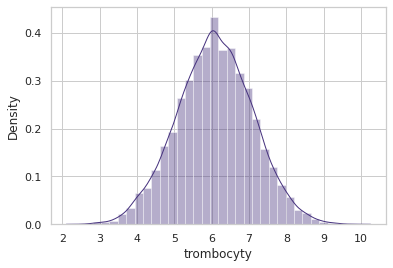

In [815]:
sns.distplot(data_labor["trombocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="trombocyty", bins=24, kde=True)
print(f"[trombocyty] Medián:  ", data_labor["trombocyty"].median())
print(f"[trombocyty] Modus:   ", data_labor.mode()["trombocyty"][0])
print(f"[trombocyty] Priemer: ", data_labor["trombocyty"].mean())
print(f"[trombocyty] Rozptyl: ", np.var(data_labor["trombocyty"]))
print(f"[trombocyty] Smerodajná odchylka: ", np.std(data_labor["trombocyty"]))

### Váha

Ako sme vyčítali z metódy describe() na začiatku, tak na grafe sa nám potvrdilo,
že niektoré hodnoty váh siahajú do záporného regiónu. O to sa postaráme neskôr
v tomto notebooku.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[weight] Medián:   70.7939
[weight] Modus:    -13.06891
[weight] Priemer:  70.30565801624712
[weight] Rozptyl:  1223.2637015794558
[weight] Smerodajná odchylka:  34.9751869413082


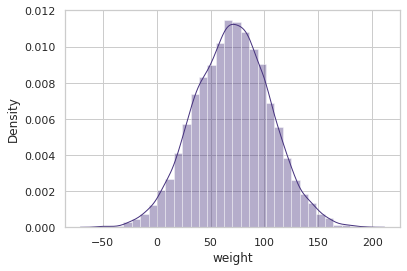

In [816]:
sns.distplot(data_labor["weight"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="weight", bins=24, kde=True)
print(f"[weight] Medián:  ", data_labor["weight"].median())
print(f"[weight] Modus:   ", data_labor.mode()["weight"][0])
print(f"[weight] Priemer: ", data_labor["weight"].mean())
print(f"[weight] Rozptyl: ", np.var(data_labor["weight"]))
print(f"[weight] Smerodajná odchylka: ", np.std(data_labor["weight"]))

### Hemoglobin

Pri hemoglobíne vidíme, že distribúcia nie je Gaussova, pretože má veľký sklon a v maximálnych hodnotách
je krivka široká, to znamená, že veľká časť dát má hodnotu blízku k maximálnej

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[hemoglobin] Medián:   6.11531
[hemoglobin] Modus:    6.0629517464788725
[hemoglobin] Priemer:  6.062951746478873
[hemoglobin] Rozptyl:  3.0341928901248703
[hemoglobin] Smerodajná odchylka:  1.7418934784093056


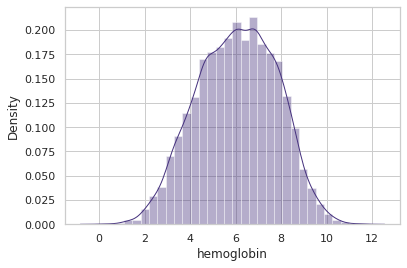

In [817]:
sns.distplot(data_labor["hemoglobin"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="trombocyty", bins=24, kde=True)
print(f"[hemoglobin] Medián:  ", data_labor["hemoglobin"].median())
print(f"[hemoglobin] Modus:   ", data_labor.mode()["hemoglobin"][0])
print(f"[hemoglobin] Priemer: ", data_labor["hemoglobin"].mean())
print(f"[hemoglobin] Rozptyl: ", np.var(data_labor["hemoglobin"]))
print(f"[hemoglobin] Smerodajná odchylka: ", np.std(data_labor["hemoglobin"]))

## b) Párová analýza dát
-------------------------------------------------------
### **Skúmanie vzťahov medzi dvojicami atribútov**

<br>

V tejto časti zisťujeme **závislosti** medzi rôznymi atribútmi po dvojiciach. Keďže naše dáta
ešte stále nie sú očistené, výsledné závislosti **nemôžu byť stopercentne korektné**.
</br>
<br>
Na začiatok sme vykreslili **heatmapu**, z ktorej môžeme vyčítať **závislosti medzi všetkými dvojicami
atribútov**. Vďaka tomu máme všeobecný prehľad o koreláciách v našom datasete.
</br>

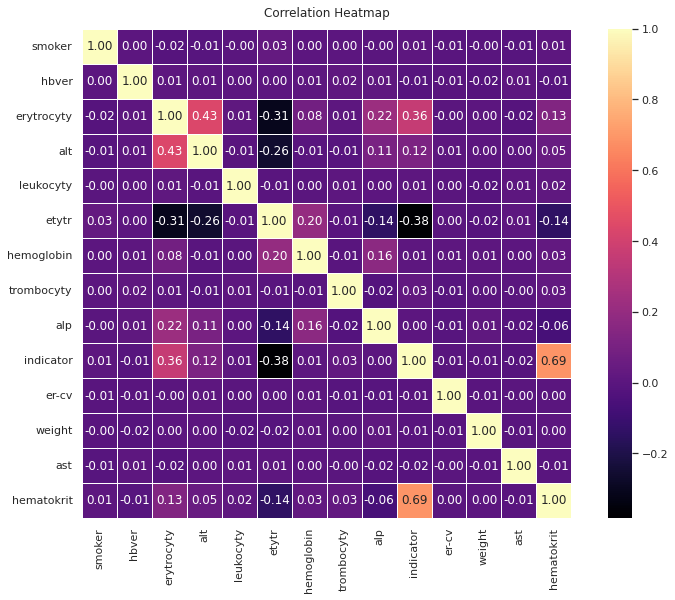

In [818]:
fig, ax = plt.subplots(figsize=(13, 9))
heatmap = sns.heatmap(data_labor.corr(), linewidths=.5, square=True,
                      annot=True, linewidth=0.5, cmap="magma", fmt=".2f",
                      annot_kws={"fontsize":12})
heatmap.set_title('Correlation Heatmap', pad=12);

Heatmapa z prechádzajúcej bunky nám napovedá, ktoré atribúty môžeme skúmať z hľadiska závislostí.
Na začiatok si vyberieme dvojice, ktoré majú vyšší koeficient korelácie, a teda tie
dvojice atribútov od seba závisia.
<br>
### Erytrocyty a alt
Na tomto grafe môžeme pozerať **silnú závislosť**, keďže rozptyl dát je exponenciálna krivka.
Pri atribútoch, ktoré nekorelujú, budeme vidieť rôzne atypické "machule".
</br>

<AxesSubplot:xlabel='erytrocyty', ylabel='alt'>

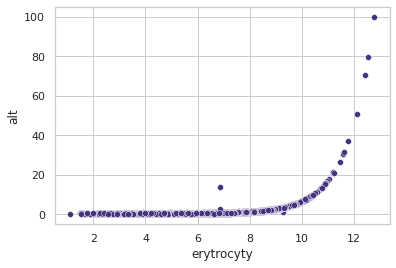

In [819]:
sns.scatterplot(data=data_labor, x="erytrocyty", y="alt")

### Hemoglobín a alp
Na danom grafe pozorujeme **sínusovú závislosť**, keďže osciluje v pravidelnom intervale.
V približnom odhade môžeme tvrdiť, že hodnoty atribútu alp dosahujú maximum vtedy,
ak sa hodnota hemoglobínu blíži k 6% a periodicky osciluje po približne šiestich
percentách.

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

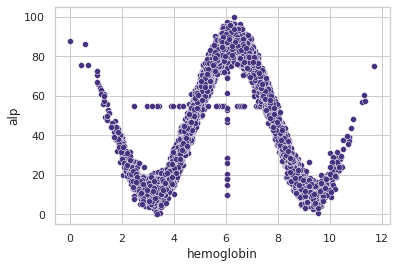

In [820]:
sns.scatterplot(data=data_labor, x="hemoglobin", y="alp")

### Hemoglobin a etytr
V danom porovnaní môžeme pozorovať miernu pozitívnu koreláciu medzi zvolenými atribútmi,
keďže distribúcia v grafe je, laicky povedané, jemne naklonená doprava hore.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='hemoglobin', ylabel='etytr'>

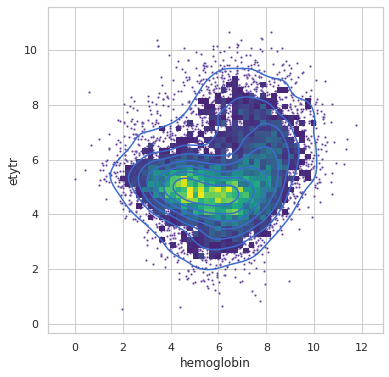

In [821]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="hemoglobin", y="etytr", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="hemoglobin", y="etytr", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="hemoglobin", y="etytr", levels=8, color="#3b6cce", linewidth=.75)

Po relatívne závislých atribútoch sme prešli k prípadom, kedy sa korelácie pohybujú v záporných
hodnotách.

### Erytrocyty a Leukocyty
Ako prvú máme vykreslenú závislosť medzi atribútmi erytrocyty a leukocyty, ktorých hodnota korelácie
sa blíži v rádoch stotín k nule.

Nulová korelácia je pozorovateľná na grafe, keďže výskyt závislosti je roztrúsený v kruhovom tvare
uprostred grafu.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='erytrocyty', ylabel='leukocyty'>

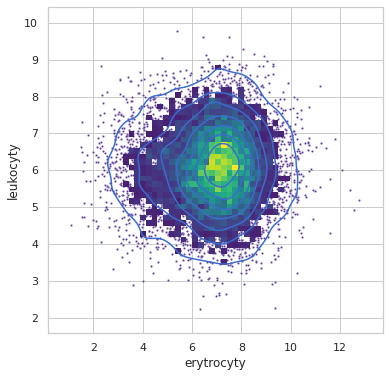

In [822]:
# sns.scatterplot(data=data_labor, x="erytrocyty", y="leukocyty")

plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="erytrocyty", y="leukocyty", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="erytrocyty", y="leukocyty", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="erytrocyty", y="leukocyty", levels=8, color="#3b6cce", linewidth=.75)

### Erytrocyty a etytr
Pri porovnaní atribútov **erytrocyty** a **etytr** pozorujeme stredne veľkú negatívnu koreláciu,
keďže rozptyl dát je "negatívne naklonený", čo znamená, že pri rastúcej hodnote erytrocytov
klesá hodnota atribútu etytr.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='erytrocyty', ylabel='etytr'>

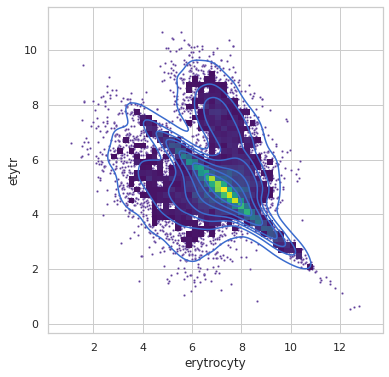

In [823]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="erytrocyty", y="etytr", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="erytrocyty", y="etytr", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="erytrocyty", y="etytr", levels=8, color="#3b6cce", linewidth=.75)

### **Skúmanie závislostí medzi predikovanou premennou a ďalšími atribútmi**
V tejto časti sa povenujeme **závislostiam medzi predikovanou premennou** a ostatnými premennými.
Predikovaná premenná je v našom prípade **indicator**.

### Indikátor a erytrocyty (0.36)

Z heatmapy vieme vyčítať, že dvojica atribútov indikátor a erytrocyty je **mierne pozitívne závislá**.
Tieto rozdiely sú badateľné na grafe nižšie, keďže zhluky dát sú zľahka rozdielne deformované a
vertikálne posunuté.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


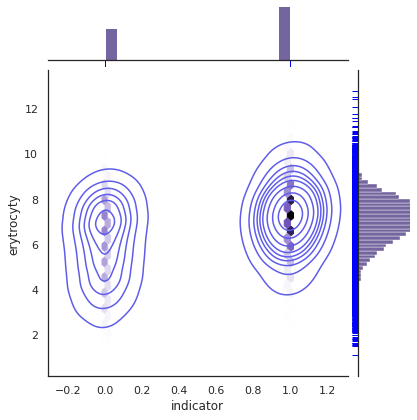

In [824]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "erytrocyty", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='erytrocyty'>

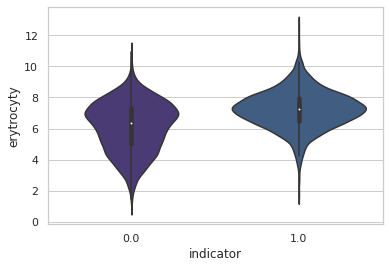

In [825]:
sns.violinplot(data=data_labor, x='indicator', y = 'erytrocyty')

### Indikátor a hematokrit (0.69)

Na tejto dvojici atribútov pozorujeme veľmi **silnú pozitívnu závislosť**, ktorá je viditeľná na oboch
typoch grafov (violin plote aj joint plote). S nárastom hodnoty indikátoru z 0 na 1 výrazne rastie
aj hodnota hematokritu.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


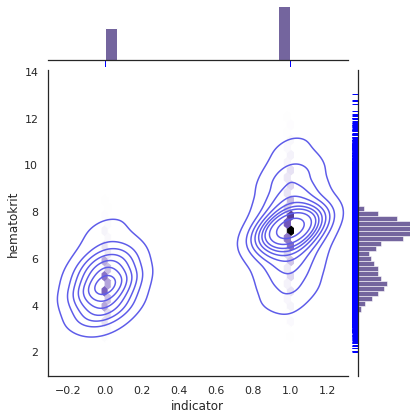

In [826]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "hematokrit", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='hematokrit'>

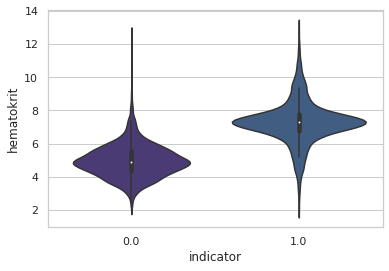

In [827]:
sns.violinplot(data=data_labor, x='indicator', y = 'hematokrit')


### Indikátor a trombocyty (0.027)

**Takmer nulová závislosť** - hodnoty hematokritu sú takmer zhodné pre rôzne hodnoty indikátoru.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


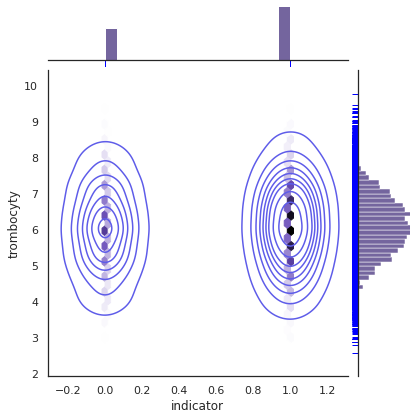

In [828]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "trombocyty", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='trombocyty'>

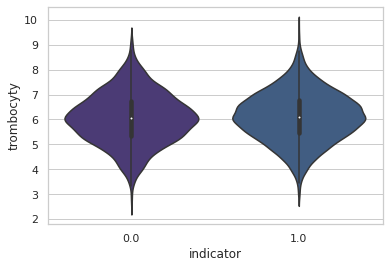

In [829]:
sns.violinplot(data=data_labor, x='indicator', y = 'trombocyty')

### Indikátor a etytr (-0.38)

**Mierne negatívna závislosť** je viditeľná tak, že pri náraste hodnoty indikátoru klesá
hodnota atribútu etytr. Distribúcia pri rôznom indikátore je taktiež **odlišná**.

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


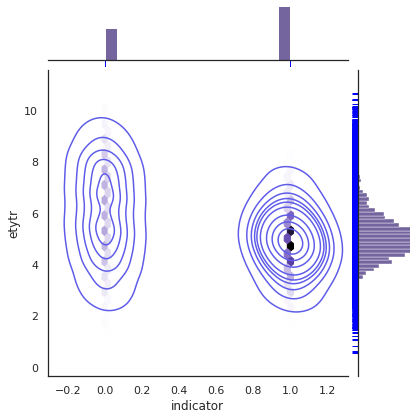

In [830]:
with sns.axes_style('white'):
    graph = sns.jointplot("indicator", "etytr", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='etytr'>

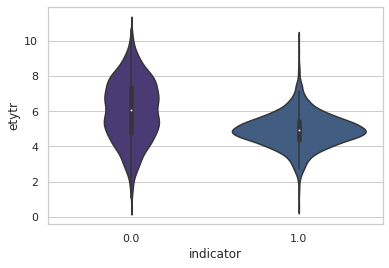

In [831]:
sns.violinplot(data=data_labor, x='indicator', y = 'etytr')

## c) Formulácia a štatistické overenie hypotéz o dátach
-------------------------------------------------------
### Formulácia hypotéz

#### 1. Hypotéza:
##### (**H0**): Pacienti v lepšom stave majú rovnaké hodnoty erytrocytov v krvi ako pacienti
##### v horšom stave.
##### (**H1**): Pacienti v lepšom stave majú iné hodnoty erytrocytov v krvi ako pacienti
##### v horšom stave.

#### 2. Hypotéza:
##### (**H0**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rovnaké
##### ako pacienti v lepšom stave.
##### (**H1**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rôzne
##### ako pacienti v lepšom stave
-------------------------------------------------------

Tieto hypotézy sme si zvolili z toho dôvodu, že predchádzajúca časť nám naznačila tieto poznatky,
z ktorých vychádzajú dané hypotézy. Pred samotným začiatkom štatistického overenia hypotéz
vykreslíme zopár grafov, z ktorých zistíme, či sú dané **dáta vhodné** na použitie štatistických
testov.

#### 1. Hypotéza:

V prvom boxenplote môžeme vidieť iný typ porovnania závislostí indikátora od erytrocytov, ako
sme použili v predchádzajúcej časti, no výsledok je v podstate rovnaký.

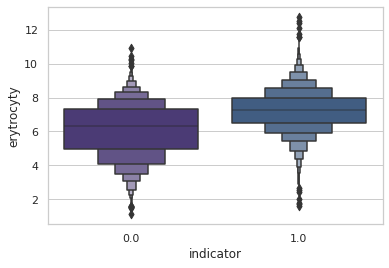

In [832]:
g = sns.boxenplot(data=data_labor, x='indicator', y = 'erytrocyty')

Následne skontrolujeme atribúty indikátor a erytrocyty a ich hodnoty, napr. či sú ich distribúcie
normálne alebo či ich dáta nezasahujú do záporných hodnôt, čo je z logického hľadiska nezmysel.

In [833]:
data_labor[['erytrocyty', 'indicator']].describe()

,erytrocyty,indicator
count,9971.000000,9971.000000
mean,6.842049,0.643165
std,1.460087,0.479090
min,1.103640,0.000000
25%,6.037930,0.000000
50%,7.004430,1.000000
75%,7.807580,1.000000
max,12.769020,1.000000


/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[erytrocyty] Medián:   7.00443
[erytrocyty] Modus:    6.842048781567562
[erytrocyty] Priemer:  6.842048781567561
[erytrocyty] Rozptyl:  2.1316401076201124
[erytrocyty] Smerodajná odchylka:  1.4600137354217297


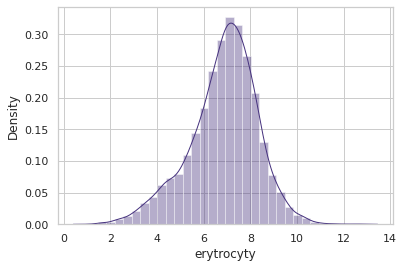

In [834]:
sns.distplot(data_labor["erytrocyty"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[indicator] Medián:   1.0
[indicator] Modus:    1.0
[indicator] Priemer:  0.6431651790191556
[indicator] Rozptyl:  0.22950373151641315
[indicator] Smerodajná odchylka:  0.479065477274676


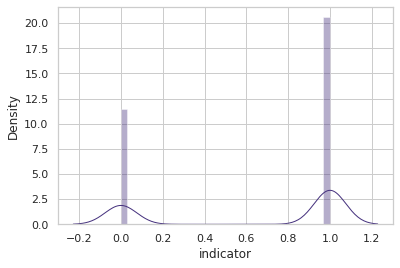

In [835]:
sns.distplot(data_labor["indicator"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[indicator] Medián:  ", data_labor["indicator"].median())
print(f"[indicator] Modus:   ", data_labor.mode()["indicator"][0])
print(f"[indicator] Priemer: ", data_labor["indicator"].mean())
print(f"[indicator] Rozptyl: ", np.var(data_labor["indicator"]))
print(f"[indicator] Smerodajná odchylka: ", np.std(data_labor["indicator"]))

Z danej krátkej analýzy dvoch atribútov sme zistili, že hodnoty indikátora sú
v očakávanej norme, kdežto hodnoty erytrocytov sa vymykajú normálu, a preto
**prílišne okrajové dáta vylúčime** v najbližšom kroku.

Okrem toho si aj rozdelíme dataset do **dvoch podsetov podľa hodnoty indikátora**.

#### Delenie atribútov do dvoch setov podľa indikátora:

In [836]:
data_0_erytrocyty = data_labor.loc[data_labor["indicator"] == 0, "erytrocyty"]

q_low = data_0_erytrocyty.quantile(0.01)
q_hi  = data_0_erytrocyty.quantile(0.99)
data_0_erytrocyty = data_0_erytrocyty[(data_0_erytrocyty < q_hi) & (data_0_erytrocyty > q_low)]

data_0_erytrocyty

0       8.89463
1       4.21847
2       7.94461
5       5.78198
17      3.89519
         ...   
9961    5.34416
9963    3.96481
9964    5.93103
9966    5.61728
9969    7.26178
Name: erytrocyty, Length: 3486, dtype: float64

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


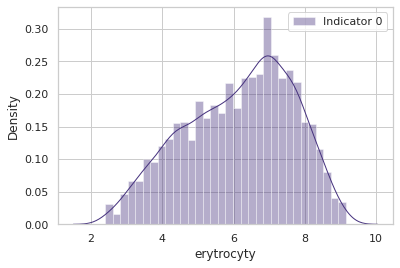

In [837]:
sns.distplot(data_0_erytrocyty, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 0")
plt.legend()

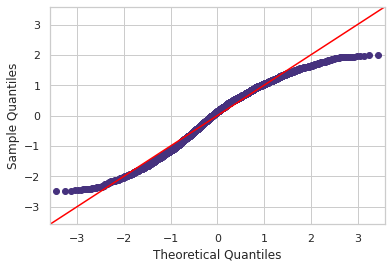

In [838]:
sm.qqplot(data_0_erytrocyty, fit=True, line="45")
plt.show()

In [839]:
data_1_erytrocyty = data_labor.loc[data_labor["indicator"] == 1, "erytrocyty"]
data_1_erytrocyty

3       7.67537
4       7.84993
6       5.61952
7       8.26529
8       6.25616
         ...   
9962    7.84604
9965    6.36163
9967    8.82840
9968    6.83179
9970    8.70299
Name: erytrocyty, Length: 6413, dtype: float64

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


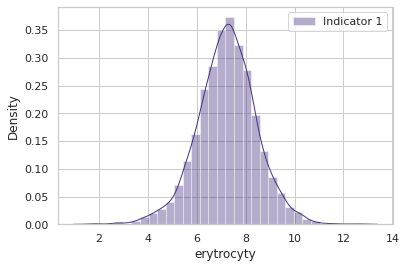

In [840]:
sns.distplot(data_1_erytrocyty, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 1")
plt.legend()

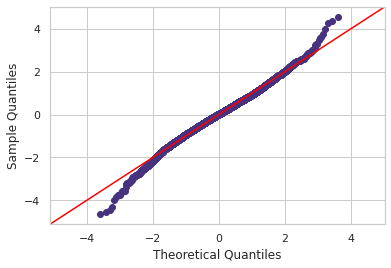

In [841]:
sm.qqplot(data_1_erytrocyty, fit=True, line="45")
plt.show()

Z predchádzajúcich grafov je nám naznačené, že **nepôjde o normálnu distribúciu**.
Následne sme si vypočítali Cohenovo déčko, aby sme vedeli určiť silu nášho testu,
resp. silu presvedčenia o výsledku, ktorý dostaneme v ďalších testoch.

Výsledok je väčší ako učebnicová hodnota 0.8, čo znamená, že výsledok nášho testu
bude dostatočne presvedčivý.

In [842]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

c_d_erytrocyty = cohen_d(data_0_erytrocyty, data_1_erytrocyty)
c_d_erytrocyty

0.825002596284856


Keďže sme si dáta rozdelili do dvoch setov podľa hypotézy, prešli sme na
**overenie nulovej hypotézy**, aby sme sa uistili,
že dáta pochádzajú z normálnej distribúcie.
Predpokladali sme, že dáta budú pochádzať skôr z rôznych distribúcií ako normálnych.

Na to nám slúži **Shapiro-Wilkov test**.

9.911477182859306e-24
Iná distribúcia (reject H0)


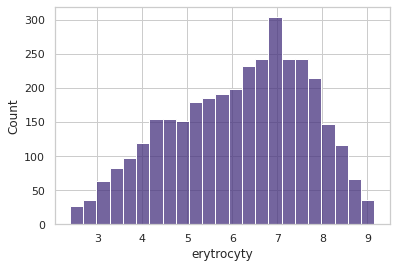

In [843]:
sns.histplot(data=data_0_erytrocyty)
alpha = 0.05
shapiro_test = stats.shapiro(data_0_erytrocyty)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

0.9940488934516907
1.063013855068175e-15
Iná distribúcia (reject H0)


/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


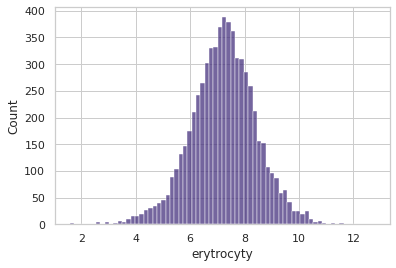

In [844]:
sns.histplot(data=data_1_erytrocyty)
alpha = 0.05
shapiro_test = stats.shapiro(data_1_erytrocyty)
print(shapiro_test.statistic)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

Keďže podľa Shapiro-Wilkovho testu distribúcia oboch vzoriek **nepatrí
do skupiny normálnych** a naše dáta sú nepárové, pokračujeme testom, ktorý sa
nazýva **Mann-Whitneyho test**. Mann-Whitneyho test použijeme ako potvrdenie
výsledku SW testu.

Ohľadom výsledku Shapiro-Wilkovho testu je potrebné spomenúť, že tento test
nie je stavaný pre vzorky dát, ktoré obsahujú viac ako **5000 záznamov**,
čo v našom prípade bolo pravdou.

In [845]:
alpha = 0.05
stat, p = mannwhitneyu(data_0_erytrocyty, data_1_erytrocyty)
print(p)

# interpret
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

7.961291210829032e-237
Different distribution (reject H0)


#### Záver 1. hypotézy

Mann-Whitneyho test potvrdil, že hypotézu **H0 môžeme zamietnuť**, vďaka čomu
môžeme tvrdiť, že pacienti v lepšom stave majú **nie rovnaké hodnoty erytrocytov**
v krvi. Minimálne výsledné hodnoty oboch testov naznačujú fakt, že hypotéza
H0 nie je konzistentná.


#### 2. Hypotéza:

Opäť sme začali iným typom zobrazenia závislostí medzi zvolenými atribútmi (tentokrát
šlo o indikátor a počet erytrocytov v krvi).

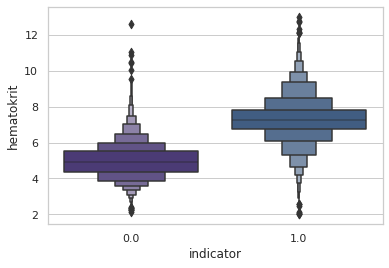

In [846]:
g = sns.boxenplot(data=data_labor, x='indicator', y = 'hematokrit')

Následne skontrolujeme atribúty indikátor a hematokrit a ich hodnoty, napr. či sú ich distribúcie
normálne alebo či ich dáta nezasahujú do záporných hodnôt, čo je z logického hľadiska nezmysel.

In [847]:
data_labor[['hematokrit', 'indicator']].describe()

,hematokrit,indicator
count,9971.000000,9971.000000
mean,6.461410,0.643165
std,1.617865,0.479090
min,1.991860,0.000000
25%,5.127505,0.000000
50%,6.753050,1.000000
75%,7.490275,1.000000
max,13.021170,1.000000


/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[hematokrit] Medián:   6.75305
[hematokrit] Modus:    6.461409967810079
[hematokrit] Priemer:  6.461409967810081
[hematokrit] Rozptyl:  2.617225818223387
[hematokrit] Smerodajná odchylka:  1.6177842310467077


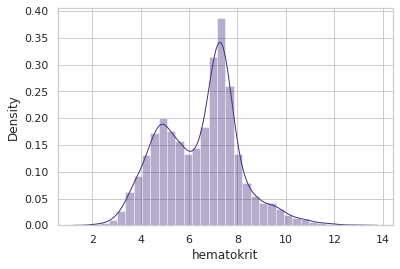

In [848]:
sns.distplot(data_labor["hematokrit"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[hematokrit] Medián:  ", data_labor["hematokrit"].median())
print(f"[hematokrit] Modus:   ", data_labor.mode()["hematokrit"][0])
print(f"[hematokrit] Priemer: ", data_labor["hematokrit"].mean())
print(f"[hematokrit] Rozptyl: ", np.var(data_labor["hematokrit"]))
print(f"[hematokrit] Smerodajná odchylka: ", np.std(data_labor["hematokrit"]))

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[indicator] Medián:   1.0
[indicator] Modus:    1.0
[indicator] Priemer:  0.6431651790191556
[indicator] Rozptyl:  0.22950373151641315
[indicator] Smerodajná odchylka:  0.479065477274676


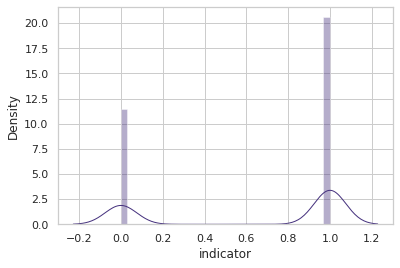

In [849]:
sns.distplot(data_labor["indicator"], kde=True, kde_kws={"lw": 1}, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[indicator] Medián:  ", data_labor["indicator"].median())
print(f"[indicator] Modus:   ", data_labor.mode()["indicator"][0])
print(f"[indicator] Priemer: ", data_labor["indicator"].mean())
print(f"[indicator] Rozptyl: ", np.var(data_labor["indicator"]))
print(f"[indicator] Smerodajná odchylka: ", np.std(data_labor["indicator"]))

Z tejto krátkej štatistickej analýzy sme zistili, že hodnoty oboch atribútov
sa pohybujú v očakávaných intervaloch, no distribúcia hematokritu nám naznačila
možný výsledok Shapiro-Wilkovho testu.

Následne sme si rozdelili dataset do **dvoch podsetov podľa hodnoty indikátora**.

In [850]:
data_0_hematokrit = data_labor.loc[data_labor["indicator"] == 0, "hematokrit"]
data_0_hematokrit

0       3.34206
1       5.78180
2       4.55230
5       4.77041
17      5.96378
         ...   
9961    5.96894
9963    5.13656
9964    3.47833
9966    4.57350
9969    4.98399
Name: hematokrit, Length: 3558, dtype: float64

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


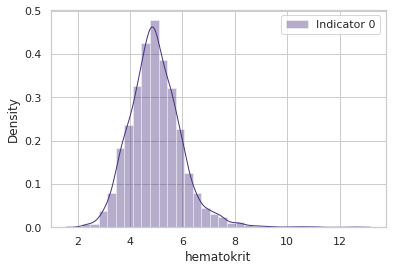

In [851]:
sns.distplot(data_0_hematokrit, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 0")
plt.legend()

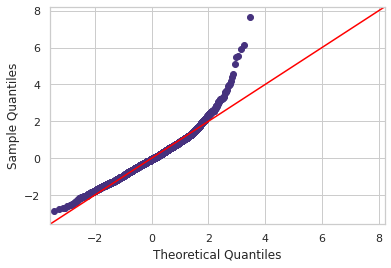

In [852]:
sm.qqplot(data_0_hematokrit, fit=True, line="45")
plt.show()

In [853]:
data_1_hematokrit = data_labor.loc[data_labor["indicator"] == 1, "hematokrit"]
data_1_hematokrit

3       7.17271
4       6.93681
6       7.60427
7       7.25248
8       6.92202
         ...   
9962    7.99329
9965    6.71859
9967    7.00122
9968    6.94466
9970    7.27724
Name: hematokrit, Length: 6413, dtype: float64

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


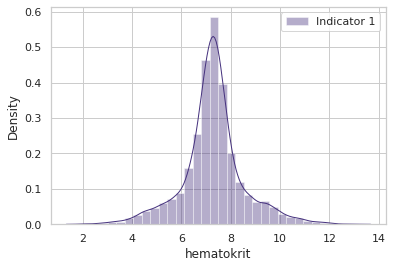

In [854]:
sns.distplot(data_1_hematokrit, kde=True, kde_kws={"lw": 1}, bins=32, label="Indicator 1")
plt.legend()

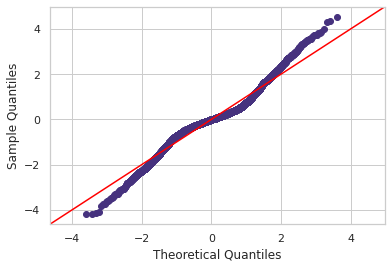

In [855]:
sm.qqplot(data_1_hematokrit, fit=True, line="45")
plt.show()

Z daných dát je očividná **rozdielnosť** týchto dvoch vzoriek ako aj ich **distribúcia**,
ktorá má od normálnosti pomerne ďaleko.

Z predchádzajúcich grafov je jasné, že **nepôjde o normálnu distribúciu**.
Následne sme prešli na výpočet **Cohen's d**.

Výsledok je väčší ako učebnicová hodnota 1 a blíži sa až k 2,
čo znamená, že **rozdiel medzi priemermi našich dvoch datasetov sa rádovo
blíži k 2 štandardným odchýlkam**.

Vďaka tejto informácií môžeme tvrdiť, že výsledok nasledujúcich testov je
**veľmi dôveryhodný**.

In [856]:
c_d_hematokrit = cohen_d(data_0_hematokrit, data_1_hematokrit)
c_d_hematokrit

1.9789760448456823

Shapiro-Wilkov test overíme aj napriek qq-plotom,
aby sme si mohli byť istí, že nejde o normálnu distribúciu.

0.9665696620941162
5.475998055323686e-28
Iná distribúcia (reject H0)


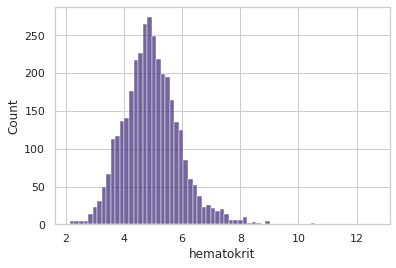

In [857]:
sns.histplot(data=data_0_hematokrit)
alpha = 0.05
shapiro_test = stats.shapiro(data_0_hematokrit)
print(shapiro_test.statistic)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

/home/marko/PycharmProjects/IAU-Stahovec-Viest/venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.9536169767379761
5.021272787215117e-41
Iná distribúcia (reject H0)


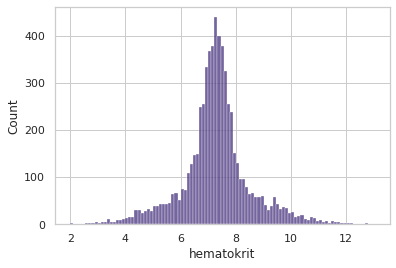

In [858]:
sns.histplot(data=data_1_hematokrit)
alpha = 0.05
shapiro_test = stats.shapiro(data_1_hematokrit)
print(shapiro_test.statistic)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

Shapiro-Wilkov test nám vrátil **extrémne nízke p-hodnoty**, čo naznačuje vyvrátenie
nulovej hypotézy. Daný predpoklad sme si ešte potvrdili **Mann-Whitneyho testom**
v nasledujúcej bunke.

In [859]:
alpha = 0.05
stat, p = mannwhitneyu(data_0_hematokrit, data_1_hematokrit)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


#### Záver 2. hypotézy

Mann-Whitneyho test potvrdil, že hypotézu **H0 môžeme zamietnuť** v prospech H1.
To znamená, že môžeme s dostatočným presvedčením predpokladať znenie alternatívnej
hypotézy.

## d) Identifikácia problémov v dátach s navrhnutým riešením
-------------------------------------------------------
### Identifikácia problémov

Táto sekcia prvej fázy je venovaná **čisteniu dát**, respektíve **hľadaniu problémov**
v datasete a vykonávanie riešení pre dané problémy. Vykonávali sme jednoduché zmeny
s cieľom udržať jednotné a čitateľné formáty, s ktorými sa jednoducho pracuje, ako napr.
zmena dátum narodenia na jednotný formát apod.

#### Nevhodná štruktúra dát

Na úvod sme otvorili druhý .csv súbor s názvom profiles.csv a vykonali sme základné
úpravy ako aj pri labor.csv na začiatku notebooku (vyhodenie prvého stĺpca, kde sú len
čísla).

In [860]:
data_profiles = pd.read_csv("dataset/profiles.csv", sep="\t")
data_profiles = data_profiles.iloc[:, 1:]
data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956/01/07,"76379 Lynn Drive\nKevinchester, VA 69374",Asian,"(Decimal('44.490493'), Decimal('-141.873900'))",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764\nEast Danielle,..."
1,"10/28/1984, 00:00:00","PSC 8195, Box 7465\nAPO AP 27883",White,"(Decimal('-60.5512795'), Decimal('101.998999'))",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080\nNew Nancy, TX 84969",Asian,"(Decimal('-24.9800585'), Decimal('-18.208792'))",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\nGalvanfort, SC 22896"
3,1910/08/08,"3368 Brent Mall Suite 782\nPort Cheryl, WV 04259",black,"(Decimal('51.679296'), Decimal('-96.270056'))",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\nFPO AE 57164
4,1972-10-28,"175 Michael Neck\nSouth Nicoleberg, PA 96022",White,"(Decimal('-85.5392635'), Decimal('-154.434283'))",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\nNorth Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988/07/28,"54115 Shelia Mall\nPerkinsland, CT 29608",White,"(Decimal('-7.930086'), Decimal('-151.534279'))",O-,420-58-2110,David Willis,M,"5488 Michelle Crescent Apt. 782\nMelissatown, ..."
3124,1948-05-03,USCGC Bowman\nFPO AP 06685,White,"(Decimal('50.0322335'), Decimal('166.727247'))",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021\nEast Ashley, TX 6..."
3125,1935/11/18,"616 John Pass Apt. 345\nBurnetttown, AZ 24833",Asian,"(Decimal('-35.8693315'), Decimal('111.435733'))",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue\nGalvanbury, AZ 98577"
3126,"12/31/2003, 00:00:00",USCGC Baker\nFPO AE 40268,White,"(Decimal('-31.539476'), Decimal('162.149407'))",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf\nSouth Branditown, TX 58506"


In [861]:
data_labor

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,1.0,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,0.0,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,1.0,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,1.0,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


Následne sme vykonali zopár základných príkazov, aby boli naše **dáta ucelenejšie**.
Začali sme úpravou rás, ktoré sa v rôznym záznamoch líšili v case-sensitivite, alebo
obsahovali ľudskú hláskovú chybu, ako napr. "blsck" namiesto správneho "Black".

In [862]:
data_profiles["race"] = data_profiles["race"].str.replace("black", "Black")
data_profiles["race"] = data_profiles["race"].str.replace("blsck", "Black")
data_profiles["race"] = data_profiles["race"].str.replace("white", "White")

data_profiles[["birthdate"]] = data_profiles[["birthdate"]].apply(pd.to_datetime)

data_profiles.head(10)

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956-01-07,"76379 Lynn Drive\nKevinchester, VA 69374",Asian,"(Decimal('44.490493'), Decimal('-141.873900'))",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764\nEast Danielle,..."
1,1984-10-28,"PSC 8195, Box 7465\nAPO AP 27883",White,"(Decimal('-60.5512795'), Decimal('101.998999'))",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080\nNew Nancy, TX 84969",Asian,"(Decimal('-24.9800585'), Decimal('-18.208792'))",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\nGalvanfort, SC 22896"
3,1910-08-08,"3368 Brent Mall Suite 782\nPort Cheryl, WV 04259",Black,"(Decimal('51.679296'), Decimal('-96.270056'))",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\nFPO AE 57164
4,1972-10-28,"175 Michael Neck\nSouth Nicoleberg, PA 96022",White,"(Decimal('-85.5392635'), Decimal('-154.434283'))",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\nNorth Madison, KS 07434"
5,1989-03-31,USNV Johnson\nFPO AP 32339,White,"(Decimal('-14.0121985'), Decimal('-122.796017'))",AB-,273-99-1555,Scott Campbell,M,"4115 Bowman Coves Apt. 957\nHollandland, NJ 93026"
6,1917-12-06,Unit 3895 Box 8817\nDPO AA 44069,Asian,"(Decimal('-35.169301'), Decimal('-153.383042'))",A-,564-52-3982,Ryan Ramirez,M,"14408 Robert Mountains Suite 672\nRichardport,..."
7,2005-03-30,"65932 Benjamin Trafficway\nBradleyview, MN 64346",White,"(Decimal('-76.0427015'), Decimal('-176.397613'))",B+,443-16-4619,John Martinez,M,Unit 1668 Box 0922\nDPO AE 29854
8,1920-08-10,"31360 Caleb Isle Suite 718\nLynnfurt, OH 70966",Black,"(Decimal('-86.563849'), Decimal('-164.137234'))",A+,667-24-8122,Ricardo Wright,M,"28996 Jacobs Rue\nPort Rachaelside, NE 55686"
9,2012-06-28,"8584 Branch Isle\nBrianshire, ND 32402",White,"(Decimal('-21.404155'), Decimal('105.809768'))",O+,421-41-3600,Angela Mcgee,F,"49107 Ortiz Hills Suite 611\nHouseborough, TN ..."


V tejto bunke sme očistili hodnoty pre súradnice tak, aby v záznamoch zostali iba
2 čísla oddelené čiarkou.

In [863]:
data_profiles["current_location"] = data_profiles["current_location"].str.replace(r"[A-Za-z]", "", regex=True)
data_profiles["current_location"] = data_profiles["current_location"].str.replace(r"[()']", "", regex=True)
data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956-01-07,"76379 Lynn Drive\nKevinchester, VA 69374",Asian,"44.490493, -141.873900",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764\nEast Danielle,..."
1,1984-10-28,"PSC 8195, Box 7465\nAPO AP 27883",White,"-60.5512795, 101.998999",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080\nNew Nancy, TX 84969",Asian,"-24.9800585, -18.208792",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\nGalvanfort, SC 22896"
3,1910-08-08,"3368 Brent Mall Suite 782\nPort Cheryl, WV 04259",Black,"51.679296, -96.270056",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\nFPO AE 57164
4,1972-10-28,"175 Michael Neck\nSouth Nicoleberg, PA 96022",White,"-85.5392635, -154.434283",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\nNorth Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988-07-28,"54115 Shelia Mall\nPerkinsland, CT 29608",White,"-7.930086, -151.534279",O-,420-58-2110,David Willis,M,"5488 Michelle Crescent Apt. 782\nMelissatown, ..."
3124,1948-05-03,USCGC Bowman\nFPO AP 06685,White,"50.0322335, 166.727247",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021\nEast Ashley, TX 6..."
3125,1935-11-18,"616 John Pass Apt. 345\nBurnetttown, AZ 24833",Asian,"-35.8693315, 111.435733",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue\nGalvanbury, AZ 98577"
3126,2003-12-31,USCGC Baker\nFPO AE 40268,White,"-31.539476, 162.149407",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf\nSouth Branditown, TX 58506"


Očistenie hodnôt pre adresy, konkrétne odstránenie \r a \n kvôli čitateľnosti.

In [864]:
data_profiles["address"] = data_profiles["address"].str.replace(r"[\r\n]", " ", regex = True)
data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956-01-07,"76379 Lynn Drive Kevinchester, VA 69374",Asian,"44.490493, -141.873900",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764\nEast Danielle,..."
1,1984-10-28,"PSC 8195, Box 7465 APO AP 27883",White,"-60.5512795, 101.998999",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080 New Nancy, TX 84969",Asian,"-24.9800585, -18.208792",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\nGalvanfort, SC 22896"
3,1910-08-08,"3368 Brent Mall Suite 782 Port Cheryl, WV 04259",Black,"51.679296, -96.270056",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\nFPO AE 57164
4,1972-10-28,"175 Michael Neck South Nicoleberg, PA 96022",White,"-85.5392635, -154.434283",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\nNorth Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988-07-28,"54115 Shelia Mall Perkinsland, CT 29608",White,"-7.930086, -151.534279",O-,420-58-2110,David Willis,M,"5488 Michelle Crescent Apt. 782\nMelissatown, ..."
3124,1948-05-03,USCGC Bowman FPO AP 06685,White,"50.0322335, 166.727247",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021\nEast Ashley, TX 6..."
3125,1935-11-18,"616 John Pass Apt. 345 Burnetttown, AZ 24833",Asian,"-35.8693315, 111.435733",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue\nGalvanbury, AZ 98577"
3126,2003-12-31,USCGC Baker FPO AE 40268,White,"-31.539476, 162.149407",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf\nSouth Branditown, TX 58506"


To isté sme spravili aj pre residence, nahradenie \r\n regexom.

In [865]:
data_profiles["residence"] = data_profiles["residence"].str.replace(r"[\r\n]", " ", regex = True)
data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956-01-07,"76379 Lynn Drive Kevinchester, VA 69374",Asian,"44.490493, -141.873900",A-,328-14-6945,Michelle Perez,F,"39446 Gabrielle Pass Suite 764 East Danielle, ..."
1,1984-10-28,"PSC 8195, Box 7465 APO AP 27883",White,"-60.5512795, 101.998999",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains Scottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080 New Nancy, TX 84969",Asian,"-24.9800585, -18.208792",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field Galvanfort, SC 22896"
3,1910-08-08,"3368 Brent Mall Suite 782 Port Cheryl, WV 04259",Black,"51.679296, -96.270056",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder FPO AE 57164
4,1972-10-28,"175 Michael Neck South Nicoleberg, PA 96022",White,"-85.5392635, -154.434283",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley North Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988-07-28,"54115 Shelia Mall Perkinsland, CT 29608",White,"-7.930086, -151.534279",O-,420-58-2110,David Willis,M,"5488 Michelle Crescent Apt. 782 Melissatown, N..."
3124,1948-05-03,USCGC Bowman FPO AP 06685,White,"50.0322335, 166.727247",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021 East Ashley, TX 66195"
3125,1935-11-18,"616 John Pass Apt. 345 Burnetttown, AZ 24833",Asian,"-35.8693315, 111.435733",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue Galvanbury, AZ 98577"
3126,2003-12-31,USCGC Baker FPO AE 40268,White,"-31.539476, 162.149407",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf South Branditown, TX 58506"


V tejto bunke sme nahradili hrúbku pri datasete labor.csv, kde sme našli chybu v jednom
z konkrétnych záznamov.

In [866]:
data_labor["relationship"] = data_labor["relationship"].str.replace("divoced", "divorced")
data_labor.head(10)

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divorced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divorced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divorced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divorced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divorced,1.0,41.10299,107.22958,34.25820,6.93681
5,0.0,6.43927,5.78198,0.38563,5.68222,3.97928,4.90713,289-95-2344,Shawn Richardson,6.70422,55.98531,divorced,0.0,70.18438,45.97264,43.98447,4.77041
6,1.0,6.20765,5.61952,0.54770,3.98821,6.22502,7.63128,684-70-5275,Janice Buchanan,7.42329,54.79463,single,1.0,52.69461,34.70731,70.42152,7.60427
7,0.0,4.31997,8.26529,1.53396,5.57558,4.13495,7.57753,555-32-3180,Catherine Jackson,5.60203,65.09512,married,1.0,49.80798,91.49829,67.64974,7.25248
8,0.0,4.82413,6.25616,0.54975,6.43054,5.79923,6.90669,479-42-8879,Amanda Garcia,6.36469,72.65451,widowed,1.0,54.45955,118.55927,44.94089,6.92202
9,0.0,5.74884,6.66503,0.52396,6.99089,5.59373,8.31328,375-27-0860,Travis Brown,5.38674,26.96196,married,1.0,42.93586,81.83422,38.56586,6.65939


#### Duplicitné záznamy

Ďalším problémom v datasete, s ktorým sme sa popasovali, bolo riešenie **duplikátnych riadkov**.
To je z hľadiska trénovanie umelej inteligencie podstatné, keďže **duplikátny riadok nepridáva
nijakú hodnotu** pre náš algoritmus, skôr môže narušiť jeho úsudok v prospech týchto rovnakých
riadkov.

V tejto bunke sme spočítali riadky, ktoré majú **duplikát** v celom datasete.

In [867]:
data_labor.duplicated(keep=False).sum()

198

Následne vyhodíme duplikátne riadky a upravíme indexy.

In [868]:
data_labor.drop_duplicates(inplace=True)
data_labor.duplicated(keep=False).sum()
data_labor.index = range(len(data_labor))
data_labor

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,1.0,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divorced,0.0,55.43592,-2.73558,51.62366,3.34206
1,1.0,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divorced,0.0,45.34617,81.56533,61.59374,5.78180
2,0.0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divorced,0.0,29.29190,151.24191,47.96329,4.55230
3,0.0,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divorced,1.0,60.47398,83.89451,57.47174,7.17271
4,1.0,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divorced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1.0,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9868,0.0,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9869,1.0,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9870,1.0,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


Naša datábaza profilov neobsahuje duplikátne riadky, čo sme overili v nasledujúcej bunke.

In [869]:
data_profiles.duplicated(keep=False).sum()

0

#### Nejednotné formáty

Príkaz spustený v bunke nižšie kontroluje, či sú všetky hodnoty vo všetých stĺpcoch
**numerické**, vďaka čomu vieme prehlásiť, že dané stĺpce s numerickými hodnotami majú
jednotný formát.

V kombinácii spolu s data_labor.info() vieme potvrdiť, že ide o dátový typ float_64 a
že ostatné dátové typy sú typu object, čo je Python reprezentácia stringu.

In [870]:
data_labor.apply(lambda y: pd.to_numeric(y, errors='coerce').notnull().all())

smoker           True
hbver            True
erytrocyty       True
alt              True
leukocyty        True
etytr            True
hemoglobin       True
ssn             False
name            False
trombocyty       True
alp              True
relationship    False
indicator        True
er-cv            True
weight           True
ast              True
hematokrit       True
dtype: bool

#### Chýbajúce a vychýlené hodnoty

V tejto sekcii sa zaoberáme najmä **vychýlenými hodnotami**, keďže chýbajúce dáta
sme už nahradzovali v skorších častiach notebooku.

## VÁHA

V nasledujúcich bunkách sme zisťovali **priemerné hodnoty** váh u mužov a žien,
keďže pri nahradzovaní záporných hodnôt pre atribút váha (a možno aj ďalších)
sme chceli **zohľadniť aj pohlavie**.

Ako môžeme vidieť na výsledkoch, tak priemerné váhy u pohlaví sú takmer identické,
kvôli čomu sme sa rozhodli túto skutočnosť **nebrať v úvahu** pri úprave záporných
hodnôt.

In [871]:
merged_data = pd.merge(data_labor, data_profiles, on="ssn")
merged_data.head(15)

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1.0,4.98718,8.89463,2.40520,5.75830,6.937120,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
1,0.0,5.00648,7.27841,0.82563,5.54481,5.032210,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
2,1.0,6.71966,7.01351,1.00377,5.66778,5.127990,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
3,1.0,6.67732,4.21847,0.66072,6.29064,5.199900,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY 7..."
4,1.0,6.06875,5.68453,0.58818,3.90764,5.879430,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY 7..."
5,1.0,6.05162,6.77173,0.45377,4.84219,5.318564,6.35723,513-39-9691,Jocelyn Kelly,5.20885,...,38.20747,5.74776,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY 7..."
6,0.0,6.51444,7.94461,1.28337,5.83567,6.887580,6.45793,881-46-4810,Crystal Kelley,6.02783,...,47.96329,4.55230,1939-04-25,"9086 Danny Cliff Mitchellport, NM 64440",Black,"75.7681605, -60.890199",A-,Crystal Kelley,F,Unit 6525 Box 9751 DPO AP 62291
7,0.0,6.34520,7.38959,0.86698,4.17522,4.904440,3.91870,881-46-4810,Crystal Kelley,4.13432,...,46.57264,5.67578,1939-04-25,"9086 Danny Cliff Mitchellport, NM 64440",Black,"75.7681605, -60.890199",A-,Crystal Kelley,F,Unit 6525 Box 9751 DPO AP 62291
8,0.0,5.31645,7.41004,0.85142,7.38934,5.339350,4.28161,881-46-4810,Crystal Kelley,6.85927,...,44.68660,7.87799,1939-04-25,"9086 Danny Cliff Mitchellport, NM 64440",Black,"75.7681605, -60.890199",A-,Crystal Kelley,F,Unit 6525 Box 9751 DPO AP 62291
9,0.0,6.05025,7.67537,0.83197,6.33300,4.459120,6.96013,826-16-7757,Doris Duncan,6.83876,...,57.47174,7.17271,1947-06-17,USNV Lewis FPO AA 51211,Indian,"51.933690, -76.430283",O+,Doris Duncan,F,"7806 Laura Walk Apt. 892 Dawnfort, WV 09432"


In [872]:
data_f_weight = merged_data.loc[merged_data["sex"] == "F", "weight"]
data_f_weight.describe()

count    4762.000000
mean       70.812782
std        35.002019
min       -54.061950
25%        46.269247
50%        71.352575
75%        95.221650
max       191.655300
Name: weight, dtype: float64

In [873]:
data_m_weight = merged_data.loc[merged_data["sex"] == "M", "weight"]
data_m_weight.describe()

count    5110.000000
mean       69.842878
std        34.899630
min       -52.358140
25%        46.050153
50%        70.071985
75%        93.041875
max       194.734070
Name: weight, dtype: float64

Rozhodli sme sa, že hodnoty váh, ktoré sú v datasete nižšie ako 5, upravíme
spôsobom, že k nim prirátame priemer z celého datasetu. Tým zabezpečíme, že záporné
hodnoty budú shiftnuté do kladných hodnôt, no stále budú menšie ako samotný priemer.
Tým docielime, že tieto záznamy stále ostanú v polovici pod priemerom, čím nenarušíme
celkový štrukturálny pomer.

In [874]:
for x in data_labor.index:
    if data_labor.loc[x, "weight"] < 5:
        data_labor["weight"][x] = data_labor["weight"][x] + data_labor["weight"].mean()

/tmp/ipykernel_20406/3867803845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["weight"][x] = data_labor["weight"][x] + data_labor["weight"].mean()


In [875]:
data_labor.describe()

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000
mean,0.406098,6.070715,6.840748,1.121319,6.066094,5.318936,6.062472,6.082949,54.632998,0.642929,51.115587,72.421383,50.468664,6.460605
std,0.491128,1.000591,1.460582,2.027797,1.009063,1.392034,1.741436,1.007018,26.084256,0.479160,12.843031,32.166619,12.751316,1.618713
min,0.000000,2.148000,1.103640,0.000000,2.239400,0.548790,0.000000,2.587100,0.000000,0.000000,0.000000,5.046350,0.000000,1.991860
25%,0.000000,5.400250,6.036600,0.564078,5.396910,4.445485,4.780697,5.405445,31.522015,0.000000,42.527228,49.105900,41.818463,5.126325
50%,0.000000,6.071692,7.004295,0.781535,6.071800,5.120610,6.109925,6.084217,58.543195,1.000000,50.944565,71.381830,50.614025,6.751880
75%,1.000000,6.741408,7.806072,1.164230,6.732252,6.019728,7.378570,6.765375,78.873415,1.000000,59.859900,94.053502,59.037908,7.489332
max,1.000000,10.532500,12.769020,100.000000,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,100.000000,194.734070,100.000000,13.021170


## ALT

Opäť sme si na začiatok vypísali zopár mien, ktoré sa vymykajú istému normálu,
no štatisticky zatiaľ nevykonávame nijaké operácie.

Na operácie s vychýlenými hodnotami sme si napísali funkciu **quantile_calc(column)**,
kde argument column je atribút, ktorý upravíme.
V tejto funkcii počítame **kvantily** pre danú hodnotu a **spodné a vrchné hranice**,
ktorým ak sá hodnoty vymykajú, tak ide o tzv. **"outliers"**, ktorí ležia **mimo bežného
rozptylu dát**.

Outliers sú dáta, ktoré sa vymykajú viac ako extrémy, a preto pre korektnú funkčnosť
našej umelej inteligencie musia byť ošetrené.

In [876]:
for x in data_labor.index:
    if data_labor.loc[x, "alt"] > 20:
        print(data_labor["name"][x])

Stacy Duncan
Tiffany Santiago
Kelly Hamilton
Austin Avila
Barry Young
Holly Brown
Scott Dennis
Jo Morgan
John Gray
Samantha Charles
Alison Steele


0.5640775
1.1642299999999999
0.6001524999999999
0 2.0644587499999996


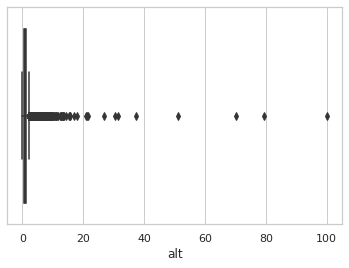

In [877]:
def quantile_calc(column):
    Q1 = data_labor[column].quantile(0.25)
    Q3 = data_labor[column].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1)
    print(Q3)
    print(IQR)
    Lower_Whisker = Q1-1.5*IQR if Q1-1.5*IQR > 0 else 0
    Upper_Whisker = Q3+1.5*IQR
    print(Lower_Whisker, Upper_Whisker)

    sns.boxplot(x=data_labor[column])

    return Lower_Whisker, Upper_Whisker

lower, upper = quantile_calc("alt")

Zistili sme, že máme priveľa **vychýlených hodnôt** a nemôžeme všetky vyhodiť z nášho datasetu.
Preto sme sa rozhodli pre metódu úpravy hodnôt pomocou **kvantilov**, keďže náhrada priemerom
by mohla znehodnotiť dataset.

Celý tento princíp opakujeme aj pre ďalšie atribúty, ktoré majú priveľký počet "outlierov".

/tmp/ipykernel_20406/805916948.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["alt"][x] = (data_labor["alt"][x]/(upper*25)) + upper


<AxesSubplot:xlabel='alt'>

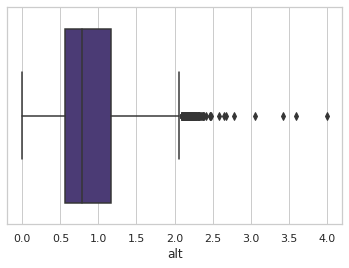

In [878]:
# 2.5 -> 2.05
# 5 -> 2.10
# 20 -> 2.40
# 100 -> 4.00

for x in data_labor.index:
    if data_labor.loc[x, "alt"] > upper:
        data_labor["alt"][x] = (data_labor["alt"][x]/(upper*25)) + upper

sns.boxplot(x=data_labor["alt"])

## HEMOGLOBÍN

Opäť sme si na začiatok vypísali zopár mien, ktoré sa vymykajú istému normálu.

Zvolili sme si výpis mien, **ktoré majú hodnoty hemoglobínu nižšie ako 1**, keďže
z metódy describe() nad našim datasetom sme vyčítali, že minimum hemoglobínu
v našom datasete je rovné 0, čo je z logického hľadiska nezmysel.

Preto aj sme upravovali iba hodnoty, ktoré ležia nižšie ako pod spodnou hranicou,
ktorú sme dostali z našej funkcie quantile_calc().

Ako úpravu sme opäť zvolili pripočítanie istej hodnoty k "outlierom", aby sme ich
shiftli do normálneho intervalu. Tou hodnotou bola v tomto prípade spodná hranica
z výpočtu kvantilov.

In [879]:
for x in data_labor.index:
    if data_labor.loc[x, "hemoglobin"] < 1:
        print(data_labor["name"][x])

Joshua Young
Phillip Brown
Gregory Morgan
Ashlee Keith


4.7806975
7.37857
2.5978725000000003
0.8838887499999992 11.27537875


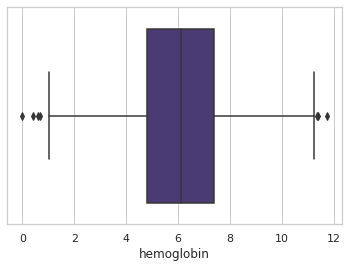

In [880]:
lower, upper = quantile_calc("hemoglobin")

/tmp/ipykernel_20406/3150018359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["hemoglobin"][x] = data_labor["hemoglobin"][x] + lower


<AxesSubplot:xlabel='hemoglobin'>

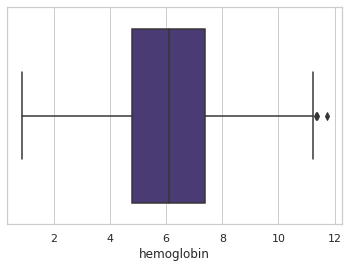

In [881]:
for x in data_labor.index:
    if data_labor.loc[x, "hemoglobin"] < lower:
        data_labor["hemoglobin"][x] = data_labor["hemoglobin"][x] + lower

sns.boxplot(x=data_labor["hemoglobin"])

## ALP

Hodnoty alpu sme nemuseli upravovať, keďže boxplot z našej funkcie nevykreslil nijakých
outlierov. Preto sme sa rozhodli daný atribút neupravovať.

In [882]:
for x in data_labor.index:
    if data_labor.loc[x, "alp"] < 1:
        print(data_labor["name"][x])

Dr. Sharon Figueroa
Scott Martin
Garrett Jimenez
James Kennedy


31.522015
78.87341500000001
47.35140000000001
0 149.90051500000004


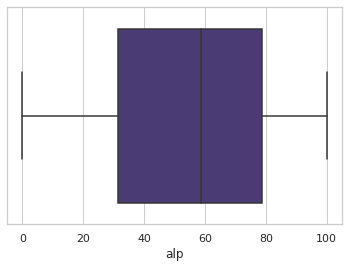

In [883]:
lower, upper = quantile_calc("alp")

## ER-CV

Pri atribúte er-cv sme upravovali hodnoty, ktoré sa vymykajú z oboch
strán intervalu.

Opäť raz sme použili našu funkciu **quantile_calc()**, ktorá nám okrem
hraničných hodnôt vykreslila boxplot, v ktorom môžeme graficky odpozorovať
vymykajúce sa hodnoty er-cv atribútu.

Na záver sme upravili outlierov z oboch koncov intervalu pripočítaním alebo
odpočítaním spodnej hraničnej hodnoty.

In [884]:
for x in data_labor.index:
    if data_labor.loc[x, "er-cv"] < 1:
        print(data_labor["name"][x])

Jonathan Scott


42.5272275
59.8599
17.3326725
16.52821875 85.85890875000001


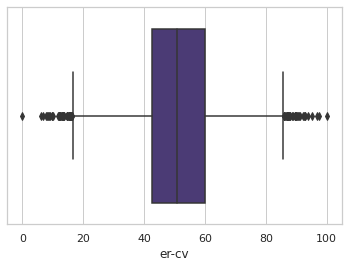

In [885]:
lower, upper = quantile_calc("er-cv")

/tmp/ipykernel_20406/2057292394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["er-cv"][x] = data_labor["er-cv"][x] - lower
/tmp/ipykernel_20406/2057292394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["er-cv"][x] = data_labor["er-cv"][x] + lower


<AxesSubplot:xlabel='er-cv'>

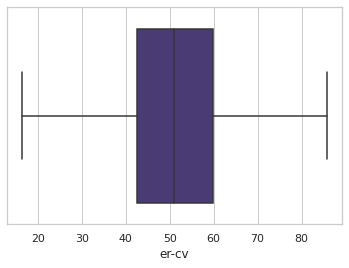

In [886]:
for x in data_labor.index:
    if data_labor.loc[x, "er-cv"] < lower:
        data_labor["er-cv"][x] = data_labor["er-cv"][x] + lower
    elif data_labor.loc[x, "er-cv"] > upper:
        data_labor["er-cv"][x] = data_labor["er-cv"][x] - lower

sns.boxplot(x=data_labor["er-cv"])

## AST

Pri atribúte AST sme zvolili identickú taktiku ako pri atribúte er-cv.
* výpis niekoľkých mien, ktoré sa vymykajú istému normálu
* výpočet hraníc a vykreslenie boxplotu
* úprava outlierov pripočítaním spodnej hranice

In [887]:
for x in data_labor.index:
    if data_labor.loc[x, "ast"] < 1:
        print(data_labor["name"][x])

Brianna Johnson
James Chang


41.8184625
59.0379075
17.219445
15.989295000000002 84.867075


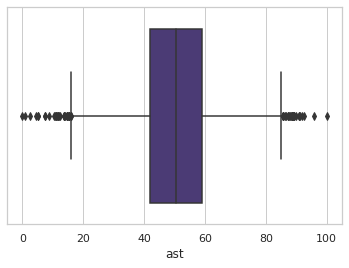

In [888]:
lower, upper = quantile_calc("ast")

/tmp/ipykernel_20406/1710326038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["ast"][x] = data_labor["ast"][x] - lower
/tmp/ipykernel_20406/1710326038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labor["ast"][x] = data_labor["ast"][x] + lower


<AxesSubplot:xlabel='ast'>

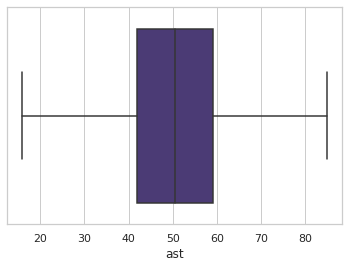

In [889]:
for x in data_labor.index:
    if data_labor.loc[x, "ast"] < lower:
        data_labor["ast"][x] = data_labor["ast"][x] + lower
    elif data_labor.loc[x, "ast"] > upper:
        data_labor["ast"][x] = data_labor["ast"][x] - lower

sns.boxplot(x=data_labor["ast"])

Touto bunkou sa naše čistenie dát končí.

In [890]:
data_labor.describe()


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000
mean,0.406098,6.070715,6.840748,0.936207,6.066094,5.318936,6.062830,6.082949,54.632998,0.642929,51.125632,72.421383,50.475143,6.460605
std,0.491128,1.000591,1.460582,0.519735,1.009063,1.392034,1.740366,1.007018,26.084256,0.479160,12.536947,32.166619,12.512106,1.618713
min,0.000000,2.148000,1.103640,0.000000,2.239400,0.548790,0.883889,2.587100,0.000000,0.000000,16.528219,5.046350,15.989295,1.991860
25%,0.000000,5.400250,6.036600,0.564078,5.396910,4.445485,4.780697,5.405445,31.522015,0.000000,42.527228,49.105900,41.818463,5.126325
50%,0.000000,6.071692,7.004295,0.781535,6.071800,5.120610,6.109925,6.084217,58.543195,1.000000,50.944565,71.381830,50.614025,6.751880
75%,1.000000,6.741408,7.806072,1.164230,6.732252,6.019728,7.378570,6.765375,78.873415,1.000000,59.859900,94.053502,59.037908,7.489332
max,1.000000,10.532500,12.769020,4.002013,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,85.724780,194.734070,84.846140,13.021170
